In [2]:
import numpy as np
import pandas as pd
import kagglehub


# Download latest version
path = kagglehub.dataset_download("mohammadtalib786/retail-sales-dataset")

print("Path to dataset files:", path)
retail = pd.read_csv(path + "/retail_sales_dataset.csv")

# Mostrar las primeras 10 filas del DataFrame
retail.head()

100%|██████████| 11.2k/11.2k [00:00<00:00, 7.91MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mohammadtalib786/retail-sales-dataset/versions/1


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### Aspectos generales de la base de datos

In [3]:
# Información general de la base de datos
retail.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### Creación de una columna de clasificacion   
Se tomará como base el monto total de la compra/venta realizada en tienda.

In [4]:
# Visualizar un resumen númerico de la columna base para la clasificación
retail["Total Amount"].describe()

,Total Amount
count,1000.000000
mean,456.000000
std,559.997632
min,25.000000
25%,60.000000
50%,135.000000
75%,900.000000
max,2000.000000


In [5]:
# Crear una columna que clasifique las ventas
def retail_category(total_spent):
    if total_spent <= 60:
        return 'Low'
    elif 60 < total_spent <= 135:
        return 'Medium'
    elif 135 < total_spent <= 900:
        return 'High'
    else:
        return 'Very High'

# Aplicar la función de categorización
retail['Categoria de venta'] = retail['Total Amount'].apply(retail_category)
retail['Categoria de venta'].value_counts()




,count
Categoria de venta,
High,298
Low,262
Medium,238
Very High,202


### Predominio de Ventas por Categoría de Producto

Después de analizar la base de datos `retail`, se observó que:

- **Categoría de Producto: Beauty**  
  Las ventas en la categoría de `Beauty` tienden a concentrarse en los niveles `Alto` y `Medio`. Esto sugiere que en esta categoría se registran precios más moderados a altos, indicando que la oferta de productos o el comportamiento de compra de los clientes se orienta hacia productos de rango medio-alto.

- **Categoría de Producto: Ropa y Electronics**  
  Para las categorías de `Ropa` y `Electronics`, las ventas están distribuidas predominantemente entre los niveles `Alto` y `Bajo`. Este patrón puede ser un indicativo de una estrategia de precios que busca atender tanto a clientes con preferencias por productos de mayor valor como a aquellos que buscan opciones más económicas.



In [6]:
# Clasificar los productos por categoria de venta
clasificacion_productos = retail.groupby('Product Category')['Categoria de venta']
clasificacion_productos.value_counts()


Product Category  Categoria de venta
Beauty            High                   84
                  Medium                 81
                  Low                    74
                  Very High              68
Clothing          High                  110
                  Low                    90
                  Medium                 87
                  Very High              64
Electronics       High                  104
                  Low                    98
                  Medium                 70
                  Very High              70
Name: count, dtype: int64

### Promedio de Precios por Categoría

La categoría `Beauty` y `Electronics` presentan precios promedio muy cercanos, con 184 y 181 respectivamente, mientras que la categoría `Ropa` tiene un precio promedio ligeramente inferior, en 174. Esto podría estar relacionado con el análisis previo de la clasificación de ventas por categoría, donde se observó una mayor concentración de ventas en los niveles `Alto` y `Medio` para `Beauty`, y en `Alto` y `Bajo` para `Ropa` y `Electronics`.


In [7]:
# Obtener el promedio de precios por categoría
mean_price_per_category = retail.groupby('Product Category')['Price per Unit'].mean()
mean_price_per_category

,Price per Unit
Product Category,
Beauty,184.055375
Clothing,174.287749
Electronics,181.900585


### Resumen de Ventas por Categoría de Producto y Género

El análisis de ventas revela que en la categoría de belleza, las mujeres generan un total de 74,830 en ventas, mientras que los hombres alcanzan 68,685. En ropa, las mujeres lideran con 81,275, en comparación con los 74,305 de los hombres. En electrónica, los hombres superan a las mujeres con 80,170 en ventas, frente a 76,735. Los precios promedio de los productos son similares entre géneros, destacando una ligera preferencia por las mujeres en belleza y ropa, mientras que los hombres dominan en la categoría de electrónica.


In [8]:
# Agrupación por 'Product Category' y 'Gender', calculando el promedio y la suma de 'Total Amount'
grouped_data = retail.groupby(['Product Category', 'Gender']).agg(
    Total_Sales=('Total Amount', 'sum'),
    Average_Price=('Price per Unit', 'mean'),
    Count_Transactions=('Transaction ID', 'count')
).reset_index()

print(grouped_data)


  Product Category  Gender  Total_Sales  Average_Price  Count_Transactions
0           Beauty  Female        74830     182.349398                 166
1           Beauty    Male        68685     186.063830                 141
2         Clothing  Female        81275     179.224138                 174
3         Clothing    Male        74305     169.435028                 177
4      Electronics  Female        76735     178.705882                 170
5      Electronics    Male        80170     185.058140                 172


### Breve análisis de la desviacipon de ventas realizadas por genero y categoría de producto

Se establece la desviación de cada categoría de la media de ventas, lo que permite interpretar algunos resultados de las primeras filas.  
  
  Por ejemplo, en la categoría **Beauty** para **Male**, una transacción de **150** tiene una desviación de **-337.13**, lo que indica que está significativamente por debajo de la media de ventas masculinas en esta categoría. En contraste, una transacción de **2000** en **Electronics** para **Female** muestra una desviación de **1548.62**, sugiriendo que esta venta es considerablemente mayor que el promedio.    
  
  Este análisis revela que las transacciones de hombres en la categoría "Clothing" tienen en su mayoría desviaciones negativas, lo que puede indicar que tienden a gastar menos en ropa, mientras que las ventas en "Electronics" para mujeres destacan por ser excepcionales, lo que podría sugerir un fuerte interés en productos electrónicos.


In [9]:
# Define una funcion que retorne la desviacion de las ventas
def calculate_deviation(row):
    # Obtener la media de 'Total Amount' para su grupo (categoría de producto y género)
    mean_sales = retail.groupby(['Product Category', 'Gender'])['Total Amount'].mean().loc[row['Product Category'], row['Gender']]
    # Calcular la desviación
    return row['Total Amount'] - mean_sales

# Aplicar la función a cada fila del DataFrame
retail['Sales_Deviation'] = retail.apply(calculate_deviation, axis=1)

# Mostrar el resultado
columnas1 = retail[['Product Category', 'Gender', 'Total Amount', 'Sales_Deviation']]
columnas1.head(20)

,Product Category,Gender,Total Amount,Sales_Deviation
0,Beauty,Male,150,-337.127660
1,Clothing,Female,1000,532.902299
2,Electronics,Male,30,-436.104651
3,Clothing,Male,500,80.197740
4,Beauty,Male,100,-387.127660
5,Beauty,Female,30,-420.783133
6,Clothing,Male,50,-369.802260
7,Electronics,Male,100,-366.104651
8,Electronics,Male,600,133.895349
9,Clothing,Female,200,-267.097701


### **Análisis gráfico**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Resumen númerico de las variables númericas
retail.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Sales_Deviation
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,500.500000,41.39200,2.514000,179.890000,456.000000,7.275958e-15
std,288.819436,13.68143,1.132734,189.681356,559.997632,5.596260e+02
min,1.000000,18.00000,1.000000,25.000000,25.000000,-4.621277e+02
25%,250.750000,29.00000,1.000000,30.000000,60.000000,-3.907831e+02
50%,500.500000,42.00000,3.000000,50.000000,135.000000,-3.170977e+02
75%,750.250000,53.00000,4.000000,300.000000,900.000000,4.329023e+02
max,1000.000000,64.00000,4.000000,500.000000,2000.000000,1.580198e+03


## Distribución de la Edad
La distribución de la edad es casi uniforme, por lo que no hay una gran variabilidad entre las edades de las personas que compran. Sin embargo, es importante notar que el rango de edad va de los 18 a los 64 años.


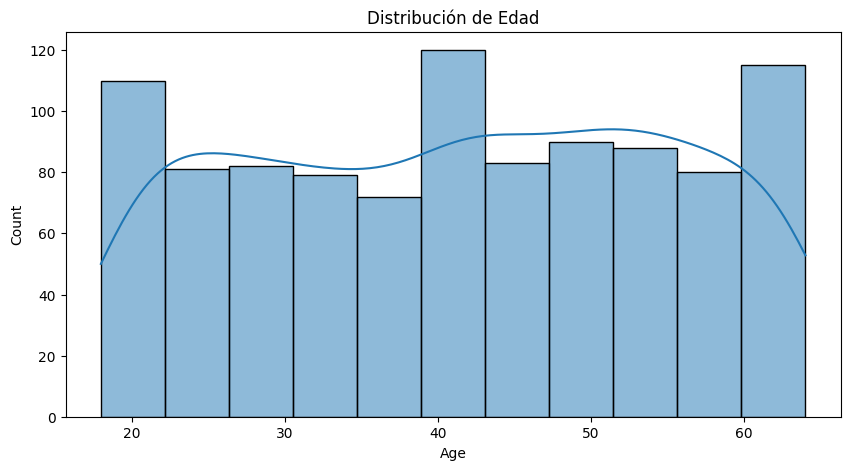

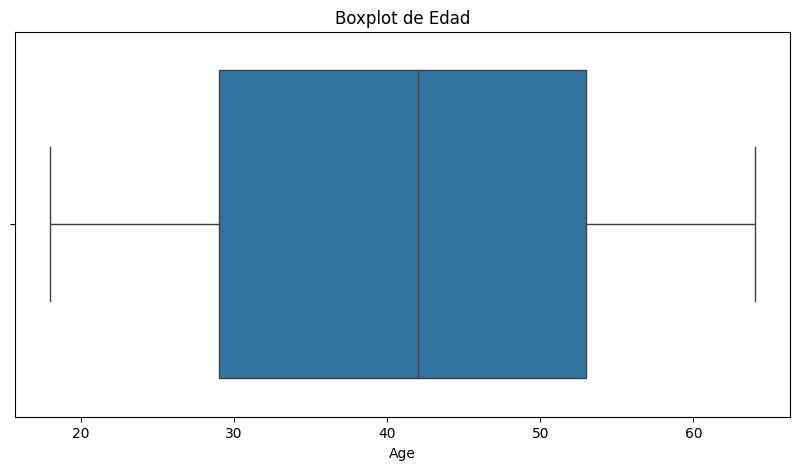

In [12]:
# Histograma para la edad
plt.figure(figsize=(10, 5))
sns.histplot(retail['Age'], kde=True)
plt.title('Distribución de Edad')
plt.show()

# Boxplot para la edad
plt.figure(figsize=(10, 5))
sns.boxplot(x=retail['Age'])
plt.title('Boxplot de Edad')
plt.show()


## Distribución de las Ventas
La distribución de las ventas muestra un sesgo hacia la derecha, con una media en torno a los 450 dólares. Esto indica que existen varios valores atípicos, los cuales podrían representar oportunidades de negocio o patrones de consumo específicos que valdría la pena analizar en mayor detalle.


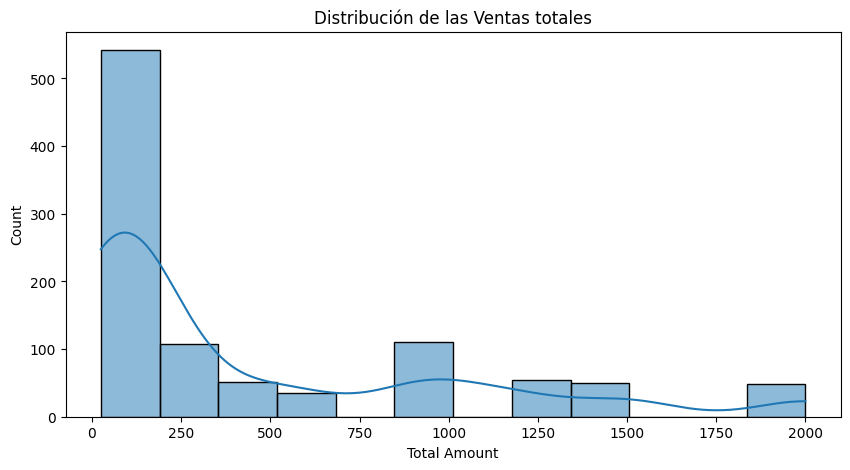

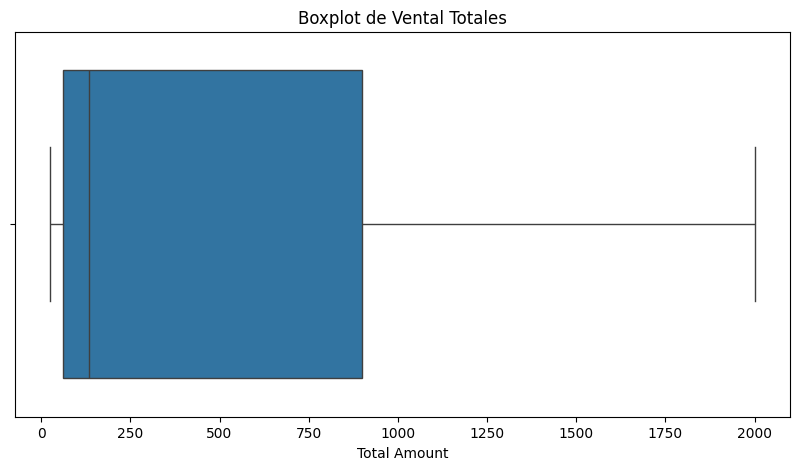

In [17]:
# Histograma y boxplot para las ventas
plt.figure(figsize=(10, 5))
sns.histplot(retail['Total Amount'], kde=True)
plt.title('Distribución de las Ventas totales')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=retail['Total Amount'])
plt.title('Boxplot de Vental Totales')
plt.show()


## Tendencia de Ventas en el Tiempo
En la tendencia de ventas a lo largo del tiempo se observa una alta variabilidad, aunque en promedio parece mantenerse constante. Esto podría deberse a diversos factores, como estacionalidad o patrones de compra, y requiere un análisis más profundo para identificar posibles causantes de esta variabilidad.


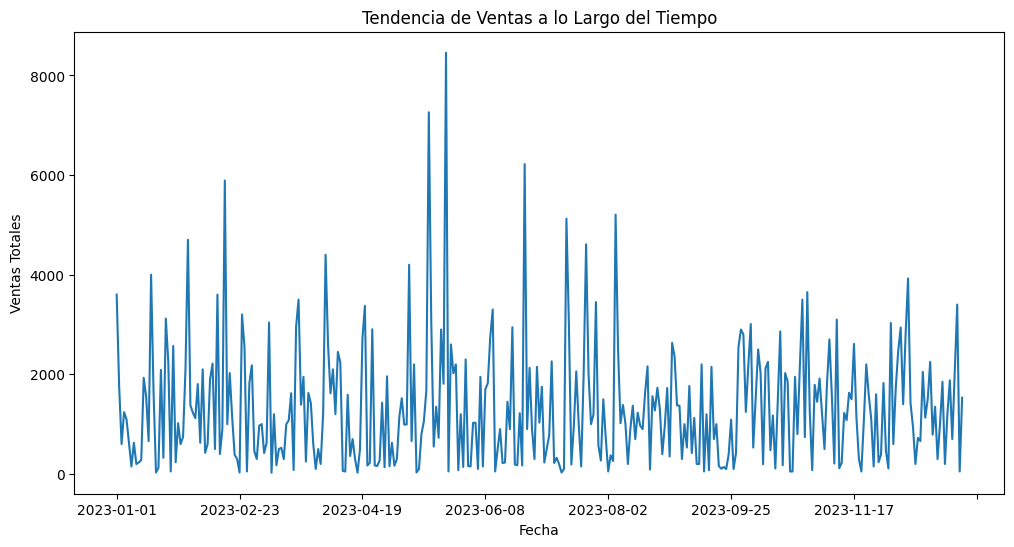

In [18]:
# Agrupar por fecha para ver la tendencia de ventas
sales_trend = retail.groupby('Date')['Total Amount'].sum()

plt.figure(figsize=(12, 6))
sales_trend.plot()
plt.title('Tendencia de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.show()


## Relación entre Edad y Cantidad Comprada
Las líneas horizontales en el gráfico de dispersión indican que no existe una relación clara entre la edad (Age) y la cantidad comprada (Quantity). Esto sugiere que los valores de `Quantity` no varían de manera significativa en función de la edad y, en cambio, están concentrados en valores específicos de `Quantity`.


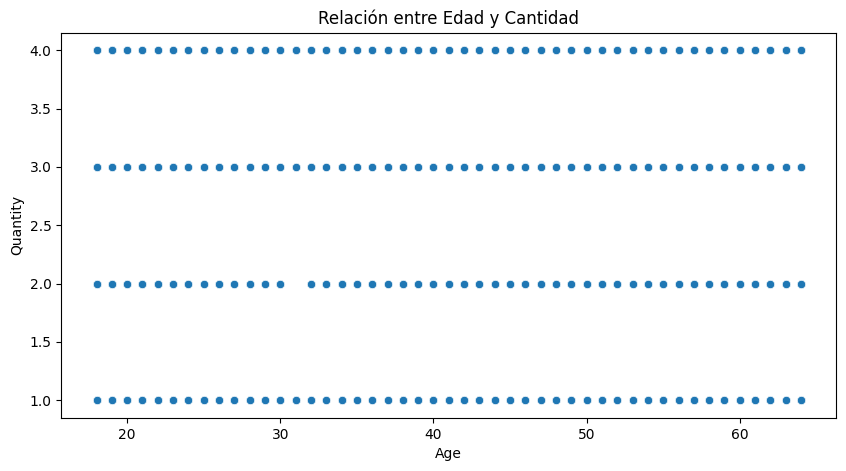

In [15]:
# Relación entre Edad y Cantidad Comprada
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Quantity', data=retail)
plt.title('Relación entre Edad y Cantidad')
plt.show()
